In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from cycler import cycler
import option_payoffs as op
import importlib
importlib.reload(op)

<module 'option_payoffs' from '/Users/kevinpark/Desktop/git/Derivatives/option_payoffs.py'>

# Put-Call Parity

In [121]:
# Current Spot Price
data_points = 200
S = np.arange(0, data_points+1, 5)
payoff_df = pd.DataFrame(index = S)
payoff_df.index.name = 'Spot'


### Inputs
# Risk-free rate
R_f = 0.04

# option premium
option_premium = 0

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Long_ZCB_payoff = op.Long_ZCB(S, X)
payoff_df['Long_ZCB'] = Long_ZCB_payoff

Short_ZCB_payoff = op.Short_ZCB(S, X)
payoff_df['Short_ZCB'] = Short_ZCB_payoff

Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff

Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff

### Protective Put = S + P (at Expiration)
Put-Call Parity assumes long stock payoff as a 45-degree line, assuming purchase price = 0, no cost of purchasing underlying stock = no breakeven point


Long_Stock BEP: S = 0
Long_Put BEP: S = 100


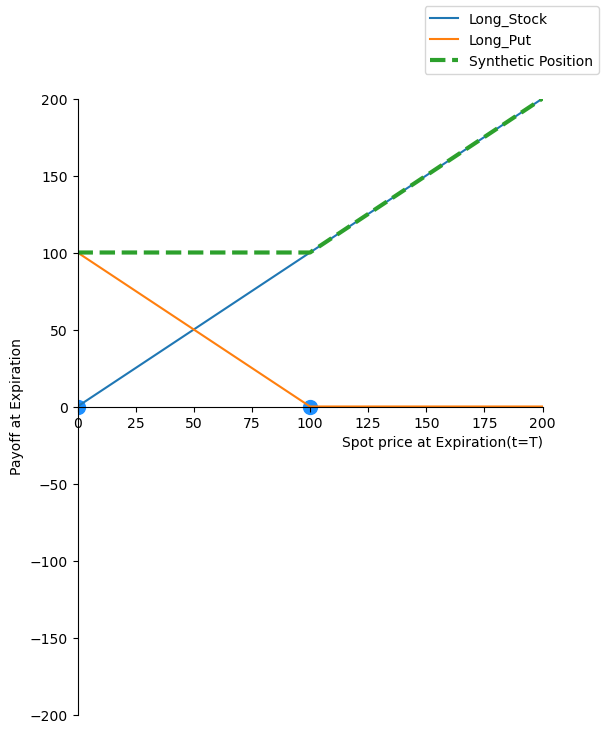

In [122]:
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price=0, N=1) 
payoff_df['Long_Stock'] = Long_Stock_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X=100, N=1, option_premium=0)
payoff_df['Long_Put'] = Long_Put_payoff

selected_positions = ['Long_Stock', 'Long_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
Protective_Put = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

### Fiduciary Call = C + X (at Expiration)

Long_Call BEP: S = 100


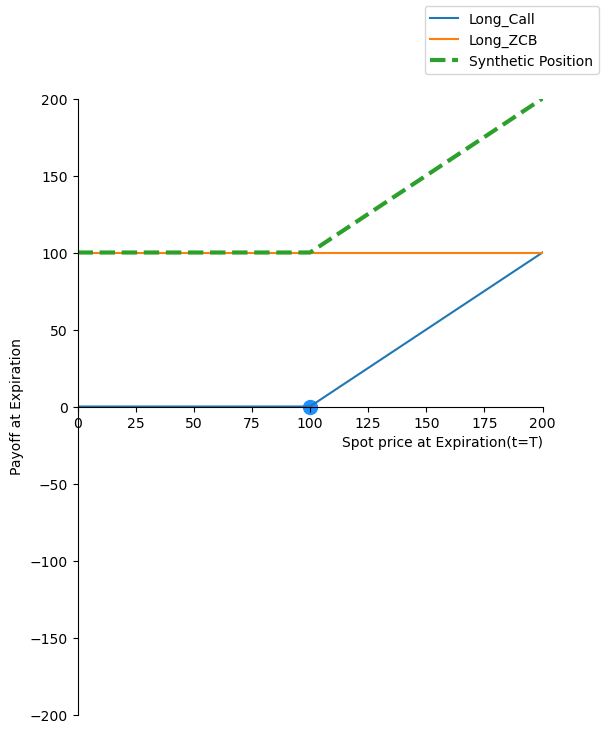

In [124]:
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X=100, N=1, option_premium=0)
payoff_df['Long_Call'] = Long_Call_payoff

Long_ZCB_payoff = op.Long_ZCB(S, X=100)
payoff_df['Long_ZCB'] = Long_ZCB_payoff

selected_positions = ['Long_Call', 'Long_ZCB']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
Fiduciary_Call = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

### Put-Call Parity: C + P = S + X (at Expiration)

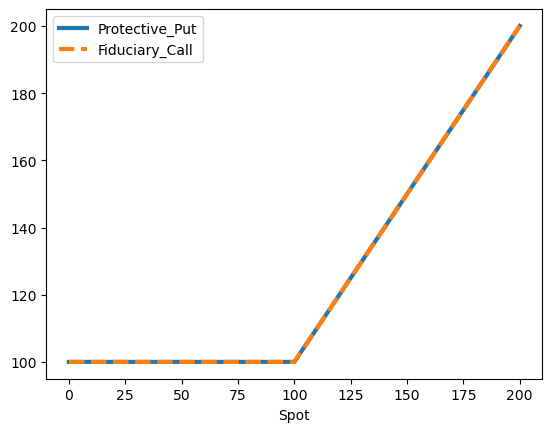

In [126]:
Protective_Put.plot(label='Protective_Put', linewidth=3)
Fiduciary_Call.plot(linestyle='--', linewidth=3, label='Fiduciary_Call')
plt.legend();

### Synthetic Stock: S = C - P + X
stock = (buy call, sell put) --> bullish bet + lend cash (Get back cash holdings at maturity) \
stock = (buy call, lend cash earn interest) --> fiduciary call(unlimited upside exposure) + sell put (limited downside by asset price=0 exposure)

Long_Call BEP: S = 100
Short_Put BEP: S = 100
Synthetic Position BEP: S = 0


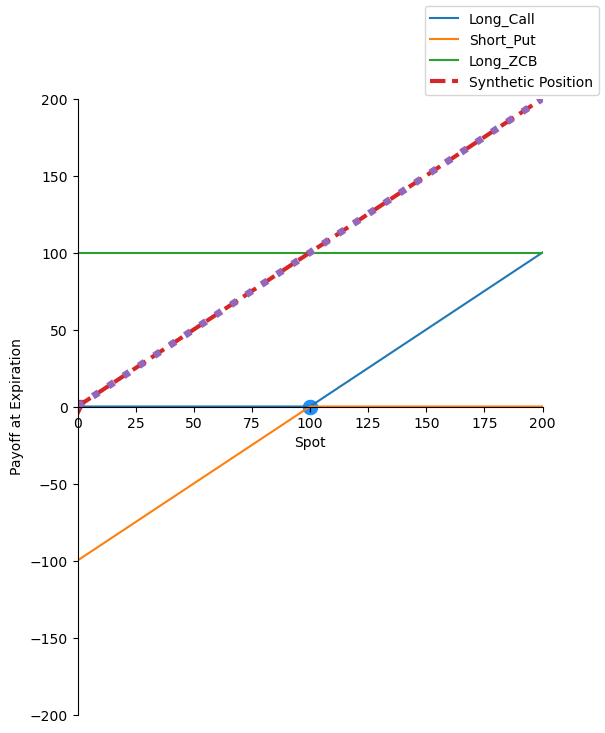

In [129]:
selected_positions = ['Long_Call', 'Short_Put', 'Long_ZCB']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent position
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price=0, N=1) 
payoff_df['Long_Stock'] = Long_Stock_payoff
payoff_df['Long_Stock'].plot(linewidth=5, linestyle=':', label='Long_Stock');

### Synthetic Put: P = C - S + X
put = buy call, short stock, lend cash (get back cash holdings at maturity) \
put = (buy call, lend cash for interest) -> fiduciary call (unlimited upside, limited downside) + short stock (unlimited downside, limited upside)

Long_Call BEP: S = 100
Short_Stock BEP: S = 0
Synthetic Position BEP: S = 100


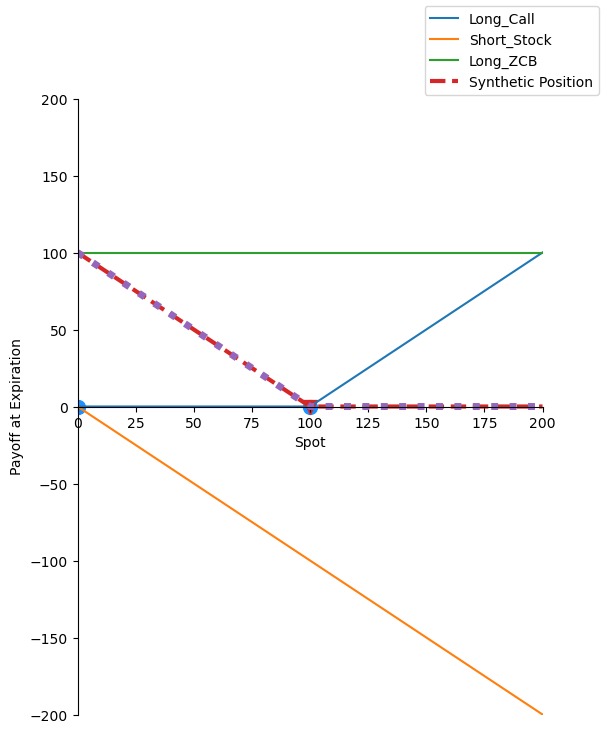

In [134]:
Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price=0, N=1) 
payoff_df['Short_Stock'] = Short_Stock_payoff

selected_positions = ['Long_Call', 'Short_Stock', 'Long_ZCB']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent position
payoff_df['Long_Put'].plot(linewidth=5, linestyle=':', label='Long_Put');

### Synthetic Call: C = S + P - X
call = (buy stock, buy put) -> protective put + borrow cash (cash repayment at maturity)

Long_Stock BEP: S = 0
Long_Put BEP: S = 100
Synthetic Position BEP: S = 0


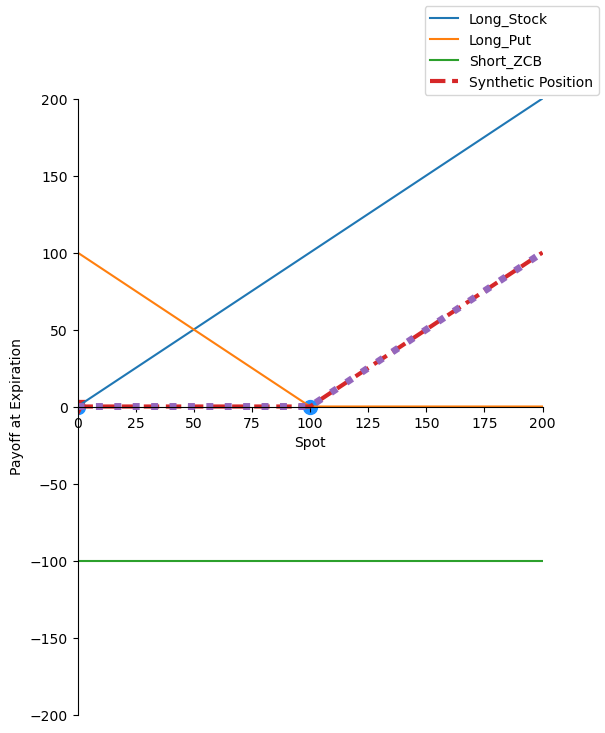

In [137]:
selected_positions = ['Long_Stock', 'Long_Put', 'Short_ZCB']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent position
payoff_df['Long_Call'].plot(linewidth=5, linestyle=':', label='Long_Call');

### Synthetic Bond: X = S + P - C
bond, or cash at maturity = (buy stock, buy put) -> protective put (unlimited upside) + sell call (unlimited downside to offset)

Long_Stock BEP: S = 0
Long_Put BEP: S = 100
Short_Call BEP: S = 100


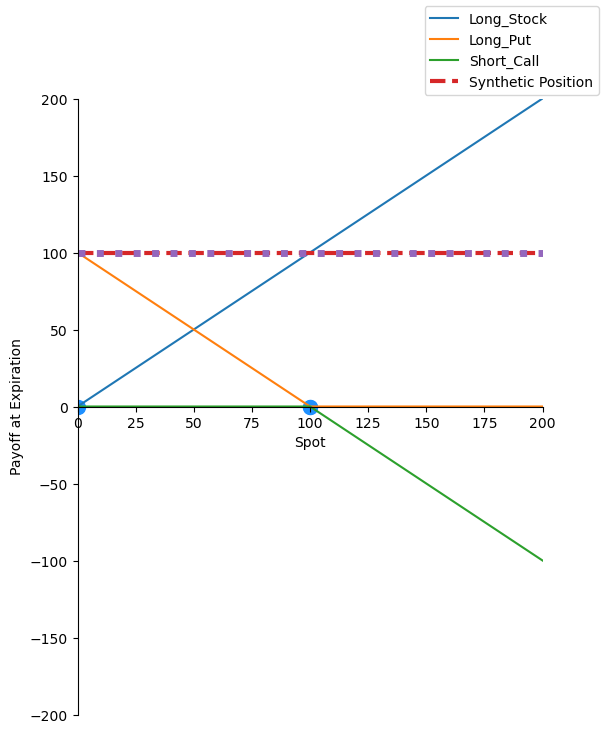

In [138]:
selected_positions = ['Long_Stock', 'Long_Put', 'Short_Call']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

payoff_df['Long_ZCB'].plot(linewidth=5, linestyle=':', label='Long_ZCB');

# Covered Stock
Covered strategies, unlike Put-Call Parity, Long/Short Stocks at purchase price --> Breakeven point exist \
somehow having a nonzero breakeven point in stock removes bond(X) out of the Put-Call Parity equation: \
now, 
### S + P = C (Protective Put = Call)

Long_Stock BEP: S = 100
Long_Put BEP: S = 100
Synthetic Position BEP: S = 0


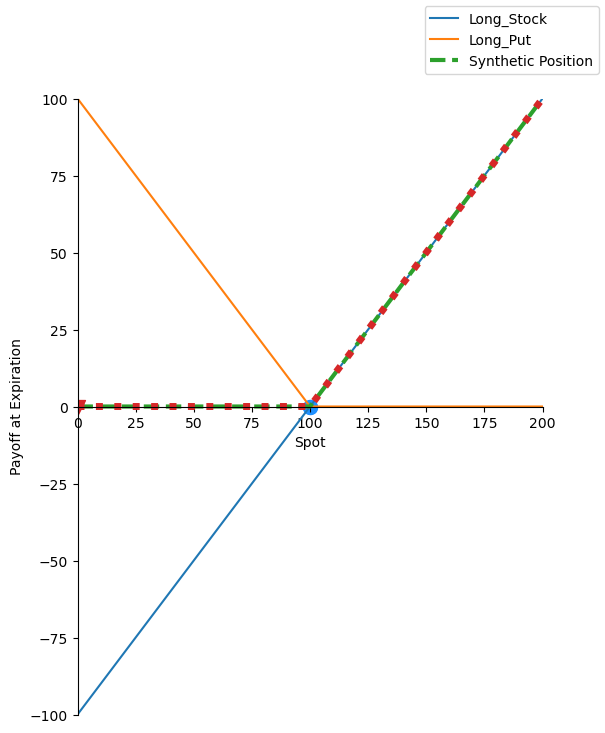

In [143]:
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price=100, N=1) 
payoff_df['Long_Stock'] = Long_Stock_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X=100, N=1, option_premium=0)
payoff_df['Long_Put'] = Long_Put_payoff

selected_positions = ['Long_Stock', 'Long_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
Protective_Put = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent position
payoff_df['Long_Call'].plot(linewidth=5, linestyle=':', label='Long_Call');

### Covered Call: S -C = -P

Long_Stock BEP: S = 100
Short_Call BEP: S = 120
Synthetic Position BEP: S = 80


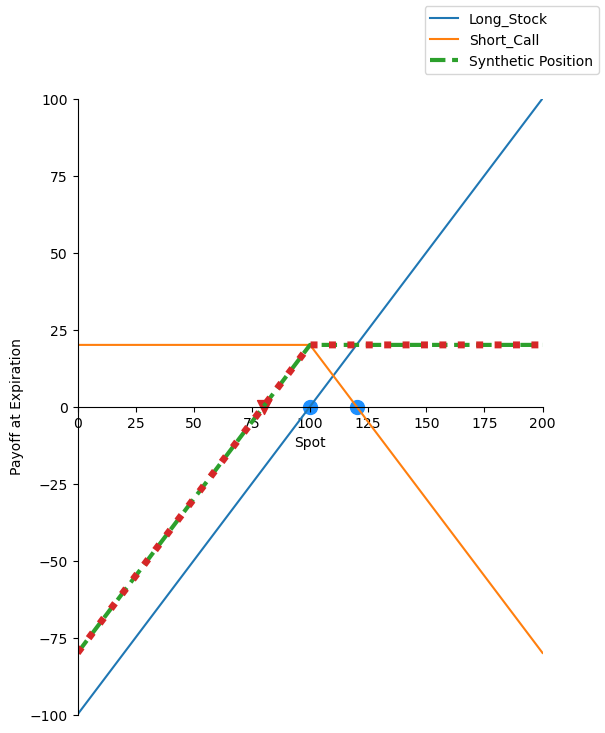

In [144]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff

selected_positions = ['Long_Stock', 'Short_Call']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff
payoff_df['Short_Put'].plot(linewidth=5, linestyle=':', label='Short_Put');

### Covered Put: -S -P = -C

Short_Stock BEP: S = 100
Short_Put BEP: S = 80
Synthetic Position BEP: S = 120


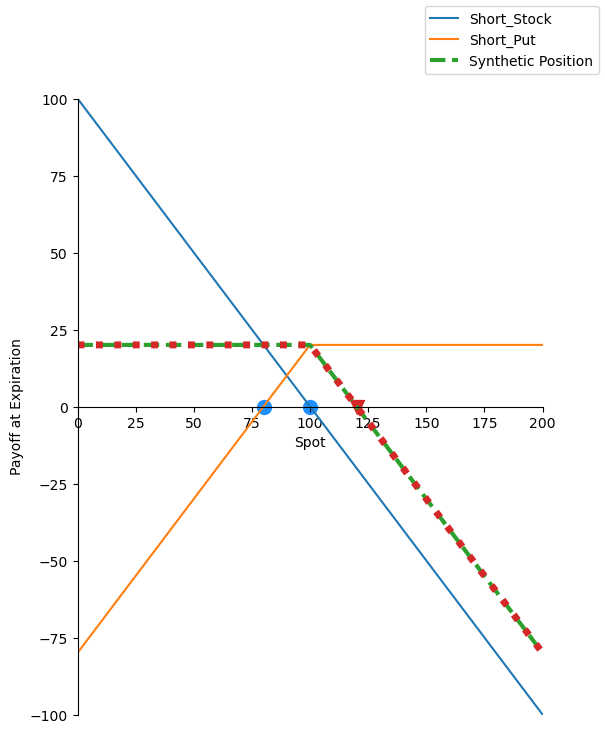

In [146]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Short_Put_payoff, Short_Put_BEP = op.Short_Put(S, X, N, option_premium)
payoff_df['Short_Put'] = Short_Put_payoff

selected_positions = ['Short_Stock', 'Short_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Short_Call_payoff, Short_Call_BEP = op.Short_Call(S, X, N, option_premium)
payoff_df['Short_Call'] = Short_Call_payoff
payoff_df['Short_Call'].plot(linewidth=5, linestyle=':', label='Short_Call');

### Protective Call: -S + C = P
if spot price increase too much, exercise call to buy stock and cover short stock position

Short_Stock BEP: S = 100
Long_Call BEP: S = 120
Synthetic Position BEP: S = 80


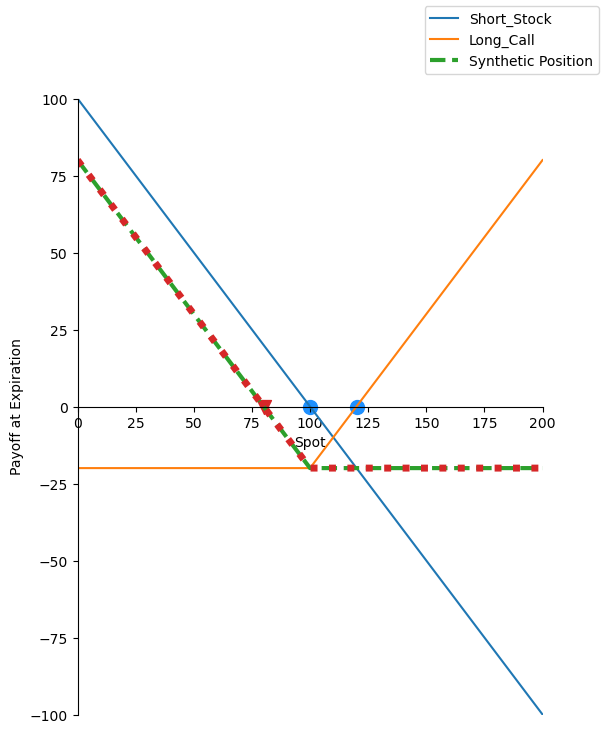

In [148]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Short_Stock_payoff, Short_Stock_BEP = op.Short_Stock(S, buy_price, N)
payoff_df['Short_Stock'] = Short_Stock_payoff

Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff

selected_positions = ['Short_Stock', 'Long_Call']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff
payoff_df['Long_Put'].plot(linewidth=5, linestyle=':', label='Long_Put');

### Protective Put: S + P = C
if stock price falls too much, exercise put to sell the stock at higher price to offset long stock loss

Long_Stock BEP: S = 100
Long_Put BEP: S = 80
Synthetic Position BEP: S = 120


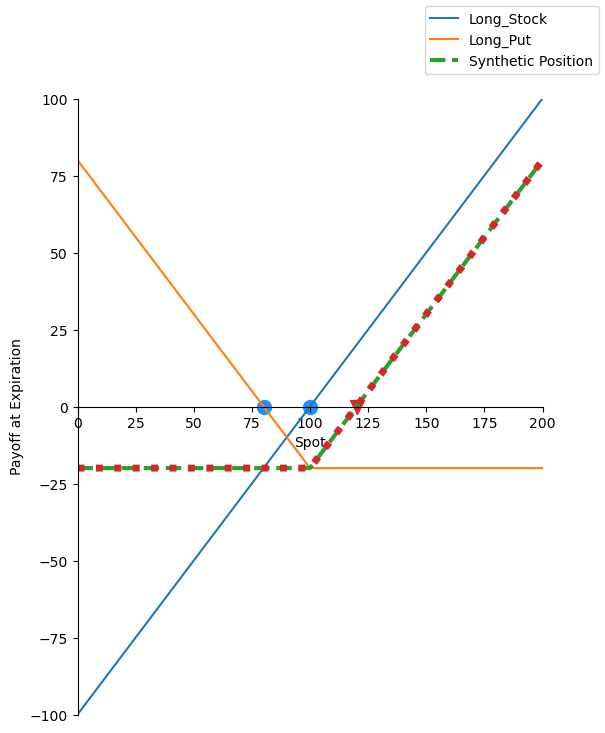

In [149]:
# option premium
option_premium = 20

# Underlying buyprice
buy_price = 100

# Excercise Price
X = buy_price

# Number of underlying assets held
N = 1

# Create Option Payoffs at Expiration (t = T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price, N)
payoff_df['Long_Stock'] = Long_Stock_payoff

Long_Put_payoff, Long_Put_BEP = op.Long_Put(S, X, N, option_premium)
payoff_df['Long_Put'] = Long_Put_payoff

selected_positions = ['Long_Stock', 'Long_Put']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent Position
Long_Call_payoff, Long_Call_BEP = op.Long_Call(S, X, N, option_premium)
payoff_df['Long_Call'] = Long_Call_payoff
payoff_df['Long_Call'].plot(linewidth=5, linestyle=':', label='Long_Call');

In [165]:
### BSM Inputs
# Excercise Price
X = 100
# continuously compounded Risk-free rate (annualized), assumed 4% 
r = 0.04
# Expected Volatility of spot asset returns until expiration date (annualized), assumed 20% 
stdev = 0.2
# (T - t)/T = 0.75 (9 months remaining to expiration date), remaining time to expiration in years 
T = 0.75

# Generate BSM option premium valuations prior to Maturity
d_1 = op.d1(S, X, r, stdev, T)
d_2 = op.d2(S, X, r, stdev, T)
# BSM Calls Option
BSM_Call_payoff = op.BSM_Call(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Call_BSM'] = BSM_Call_payoff
# BSM Put Option
BSM_Put_payoff = op.BSM_Put(S, X, r, T, d1=d_1, d2=d_2)
payoff_df['Long_Put_BSM'] = BSM_Put_payoff
# BSM Long ZCB
payoff_df['Long_ZCB_BSM'] = X * np.exp(-r * T)

Long_Stock BEP: S = 0


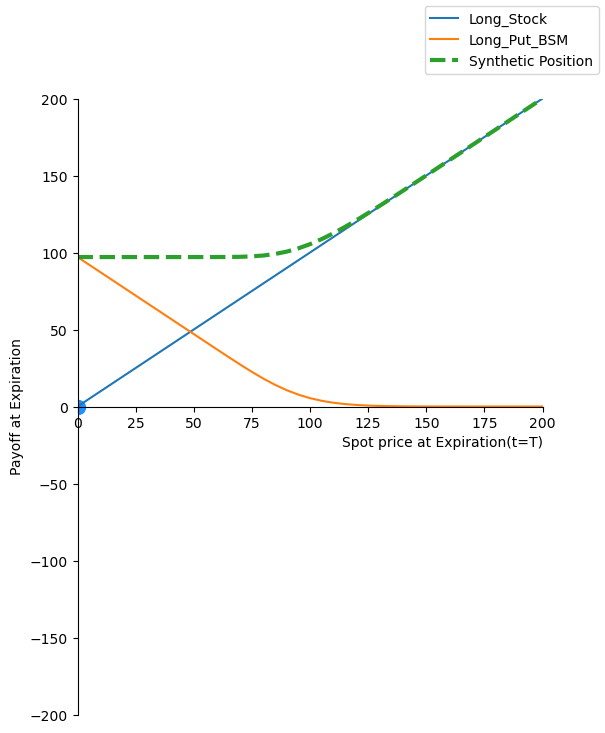

In [166]:
# BSM Protective Put
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price=0, N=1) 
payoff_df['Long_Stock'] = Long_Stock_payoff
selected_positions = ['Long_Stock', 'Long_Put_BSM']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
BSM_Protective_Put = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

Long_Call_BSM BEP: S = 0


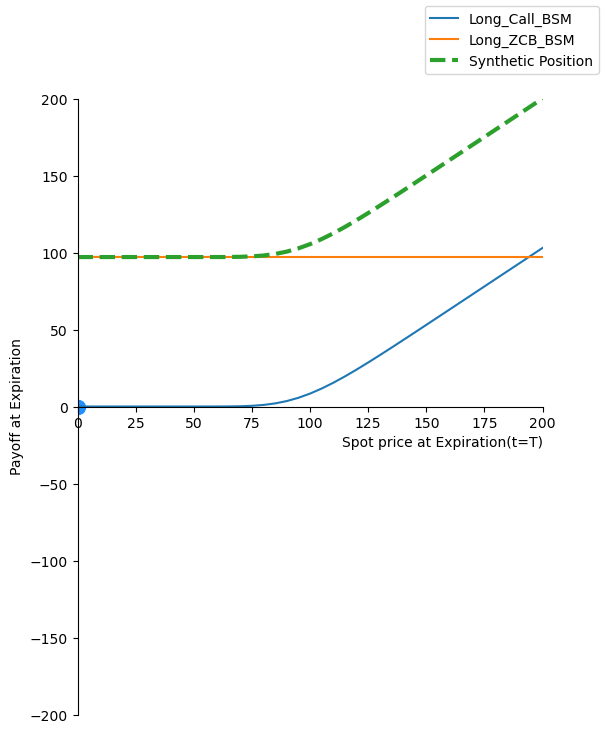

In [167]:
# BSM Fiduciary Call
selected_positions = ['Long_Call_BSM', 'Long_ZCB_BSM']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
BSM_Fiduciary_Call = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

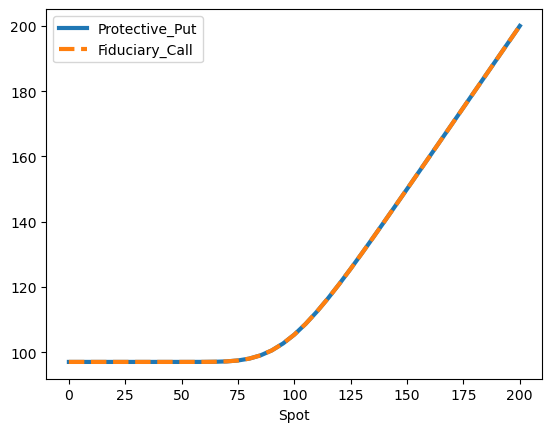

In [168]:
# Put-Call Parity: S + P = C + Xe^(-rT) at Expiration
BSM_Protective_Put.plot(label='Protective_Put', linewidth=3)
BSM_Fiduciary_Call.plot(linestyle='--', linewidth=3, label='Fiduciary_Call')
plt.legend();

### BSM: if buy price of stock = PV(X), S + P = C instead of S + P = C + PV(X)

Synthetic Position BEP: S = 0


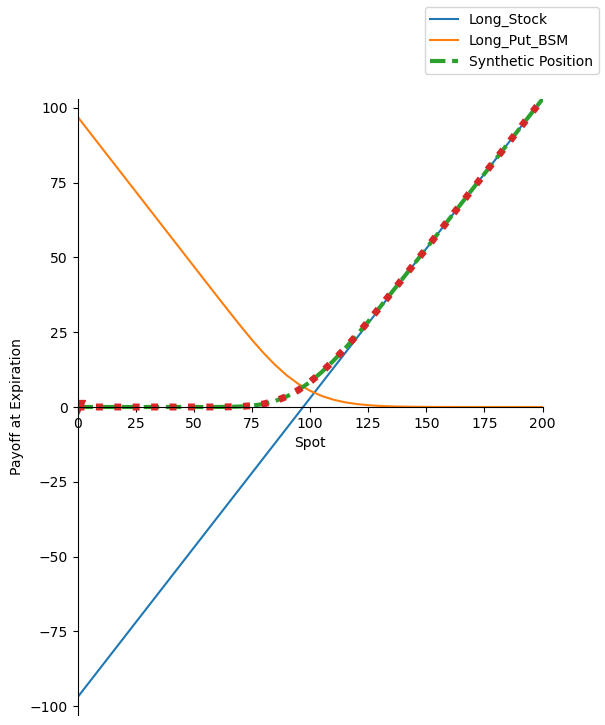

In [169]:
PV_X = X * np.exp(-r * T)
Long_Stock_payoff, Long_Stock_BEP = op.Long_Stock(S, buy_price=PV_X, N=1) 
payoff_df['Long_Stock'] = Long_Stock_payoff
selected_positions = ['Long_Stock', 'Long_Put_BSM']
payoff_df['Synthetic Position'] = payoff_df[selected_positions].sum(axis=1)
BSM_Protective_Put = payoff_df['Synthetic Position']
op.graph_payoffs(selected_positions, S, payoff_df)

# Equivalent position
payoff_df['Long_Call_BSM'].plot(linewidth=5, linestyle=':', label='Long_Call_BSM');